# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format = "%Y-%m-%d %H:%M:%S")

#### Display the top 5 rows in the data

In [3]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254


#### Show the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FIPS                 3265 non-null   float64       
 1   Admin2               3270 non-null   object        
 2   Province_State       3834 non-null   object        
 3   Country_Region       4012 non-null   object        
 4   Last_Update          4012 non-null   datetime64[ns]
 5   Lat                  3923 non-null   float64       
 6   Long_                3923 non-null   float64       
 7   Confirmed            4012 non-null   int64         
 8   Deaths               4012 non-null   int64         
 9   Recovered            4012 non-null   int64         
 10  Active               4012 non-null   int64         
 11  Combined_Key         4012 non-null   object        
 12  Incident_Rate        3923 non-null   float64       
 13  Case_Fatality_Ratio  3963 non-nul

#### Show the sum of missing values of features in the dataset

In [5]:
df.isna().sum()

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
# df.groupby(['Country_Region']).sum()
df[['Country_Region','Confirmed']].groupby(['Country_Region']).sum()

,Confirmed
Country_Region,
Afghanistan,53400
Albania,63033
Algeria,101913
Andorra,8586
Angola,18156
...,...
West Bank and Gaza,146701
Winter Olympics 2022,0
Yemen,2104


#### Show the number of Deaths by Country

In [7]:
df[['Country_Region','Confirmed']].groupby(['Country_Region']).sum()

,Confirmed
Country_Region,
Afghanistan,53400
Albania,63033
Algeria,101913
Andorra,8586
Angola,18156
...,...
West Bank and Gaza,146701
Winter Olympics 2022,0
Yemen,2104


#### Show the number of Recovered cases by Country

In [8]:
df[['Country_Region','Recovered']].groupby(['Country_Region']).sum()

,Recovered
Country_Region,
Afghanistan,43740
Albania,37327
Algeria,69011
Andorra,7724
Angola,13205
...,...
West Bank and Gaza,130102
Winter Olympics 2022,0
Yemen,1407


#### Show the number of Active Cases by Country

In [9]:
df[['Country_Region','Active']].groupby(['Country_Region']).sum()

,Active
Country_Region,
Afghanistan,7396
Albania,24473
Algeria,30099
Andorra,777
Angola,4535
...,...
West Bank and Gaza,15016
Winter Olympics 2022,0
Yemen,87


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [10]:
df[['Country_Region','Confirmed','Deaths','Recovered','Active']].groupby(['Country_Region']).sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,53400,2264,43740,7396
Albania,63033,1233,37327,24473
Algeria,101913,2803,69011,30099
Andorra,8586,85,7724,777
Angola,18156,416,13205,4535
...,...,...,...,...
West Bank and Gaza,146701,1583,130102,15016
Winter Olympics 2022,0,0,0,0
Yemen,2104,610,1407,87


### Question 3

### Show the countries with no recovered cases

In [11]:
df.loc[df['Recovered']==0][['Country_Region','Recovered']].groupby(['Country_Region']).sum()

,Recovered
Country_Region,
Antarctica,0
Australia,0
Belgium,0
Canada,0
China,0
Colombia,0
Germany,0
India,0
Kiribati,0


#### Show the countries with no confirmed cases

In [12]:
df.loc[df['Confirmed']==0][['Country_Region','Confirmed']].groupby(['Country_Region']).sum()

,Confirmed
Country_Region,
Antarctica,0
Canada,0
Colombia,0
India,0
Kiribati,0
"Korea, North",0
Malaysia,0
Mexico,0
Nauru,0


#### Show the countries with no deaths

In [13]:
df.loc[df['Deaths']==0][['Country_Region','Deaths']].groupby(['Country_Region']).sum()

,Deaths
Country_Region,
Antarctica,0
Australia,0
Belgium,0
Cambodia,0
Canada,0
China,0
Colombia,0
Denmark,0
Dominica,0


In [14]:
df.loc[df['Deaths']==0][['Country_Region','Confirmed','Deaths','Recovered']].groupby(['Country_Region']).sum()

,Confirmed,Deaths,Recovered
Country_Region,,,
Antarctica,0,0,0
Australia,90,0,71
Belgium,651639,0,0
Cambodia,391,0,371
Canada,152,0,144
China,7989,0,1047
Colombia,0,0,0
Denmark,29,0,28
Dominica,106,0,98


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [15]:
df[['Country_Region','Last_Update','Confirmed','Deaths','Recovered']].groupby(['Country_Region']).agg({'Last_Update':'last','Confirmed':'sum','Deaths':'sum','Recovered':'sum'}).nlargest(10,['Confirmed',])

,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
US,2021-04-02 15:13:53,22403255,377679,0
India,2021-01-10 05:22:12,10450284,150999,10075950
Brazil,2021-01-10 05:22:12,8081091,202769,7205410
Russia,2021-01-10 05:22:12,3344175,60523,2726336
United Kingdom,2021-01-10 05:22:12,3026299,103663,6855
France,2021-01-10 05:22:12,2824882,67733,208090
Turkey,2021-01-10 05:22:12,2317118,22631,2190047
Italy,2021-01-10 05:22:12,2257866,78394,1606630
Spain,2021-01-10 05:22:12,2050360,51874,150376


#### Show the Top 10 Countries with Active cases

In [16]:
df[['Country_Region','Last_Update','Confirmed','Deaths','Recovered','Active']].groupby(['Country_Region']).agg({'Last_Update':'last','Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'}).nlargest(10,['Active',])

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
US,2021-04-02 15:13:53,22403255,377679,0,21974518
United Kingdom,2021-01-10 05:22:12,3026299,103663,6855,2938491
France,2021-01-10 05:22:12,2824882,67733,208090,2549059
Spain,2021-01-10 05:22:12,2050360,51874,150376,1848110
Mexico,2021-01-10 05:22:12,1524036,133204,1143254,1390832
Peru,2021-01-10 05:22:12,1026180,94756,966447,931424
Netherlands,2021-01-10 05:22:12,878443,12406,10716,855321
Brazil,2021-01-10 05:22:12,8081091,202769,7205410,667957
Belgium,2021-01-10 05:22:12,662694,20038,0,651639


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [17]:
import matplotlib.pyplot as plt

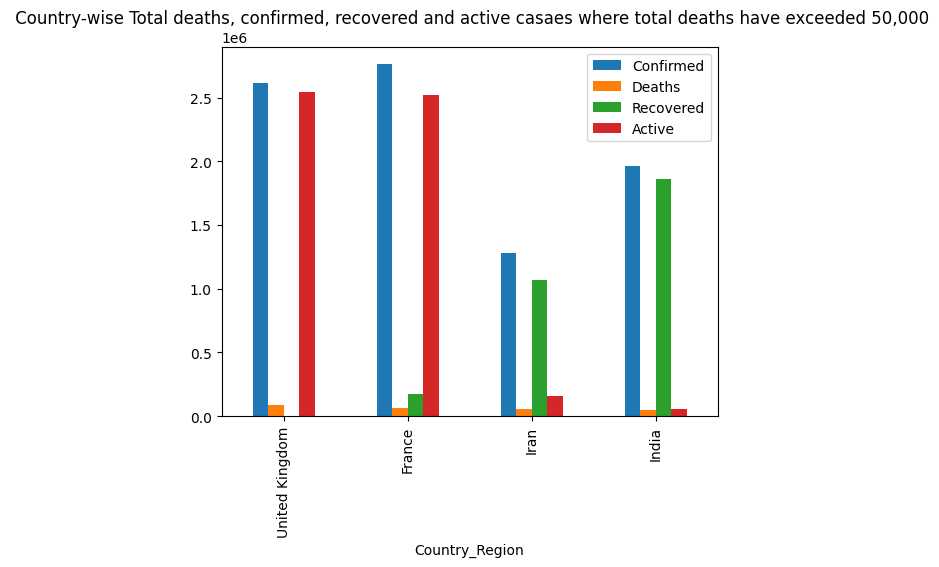

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
df_country = df.loc[df['Deaths']>=50000][['Country_Region','Confirmed','Deaths','Recovered','Active']].groupby(['Country_Region']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'}).nlargest(10,['Active',]).reset_index()
_ = df_country.plot(x='Country_Region',kind = 'bar',stacked= False,title = " Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000")

### Question 6

### Plot Province/State wise Deaths in USA

In [19]:
import plotly.express as px

In [55]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'], format = "%Y-%m-%d %H:%M:%S")

In [53]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

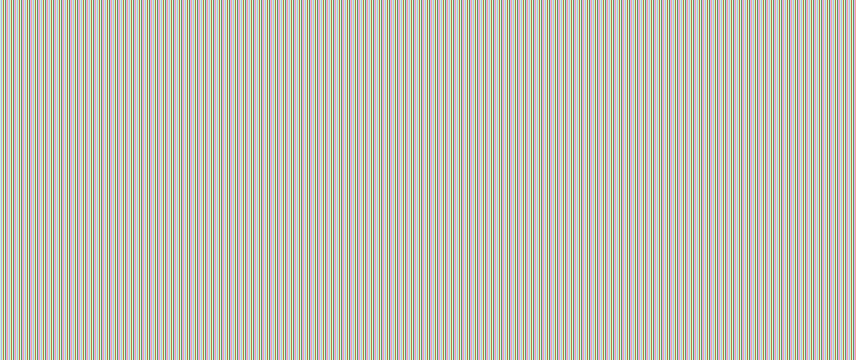

In [27]:
import plotly.express as px
covid_data_US = covid_data.loc[covid_data['Country_Region']=='US'][['Province_State','Confirmed','Deaths','Active']].groupby('Province_State').agg({'Confirmed':'sum','Deaths':'sum','Active':'sum'})
px.bar(data_frame = covid_data_US['Deaths'])

### Question 7

### Plot Province/State Wise Active Cases in USA

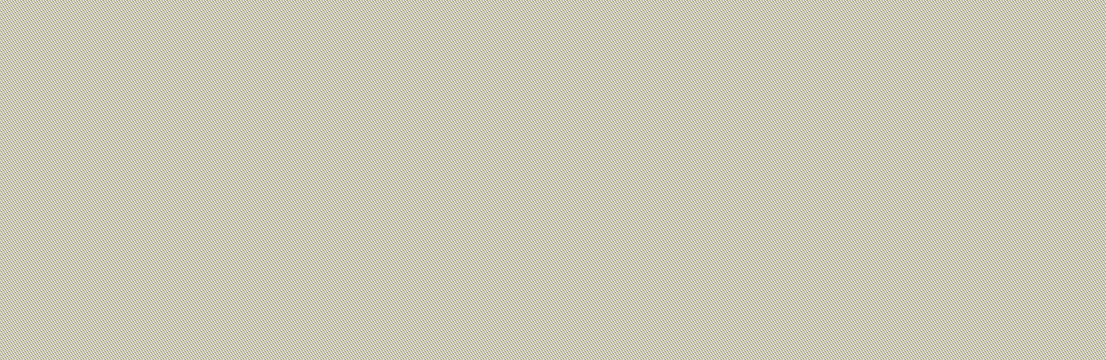

In [48]:
px.bar(data_frame = covid_data_US['Active'])

### Question 8

### Plot Province/State Wise Confirmed cases in USA

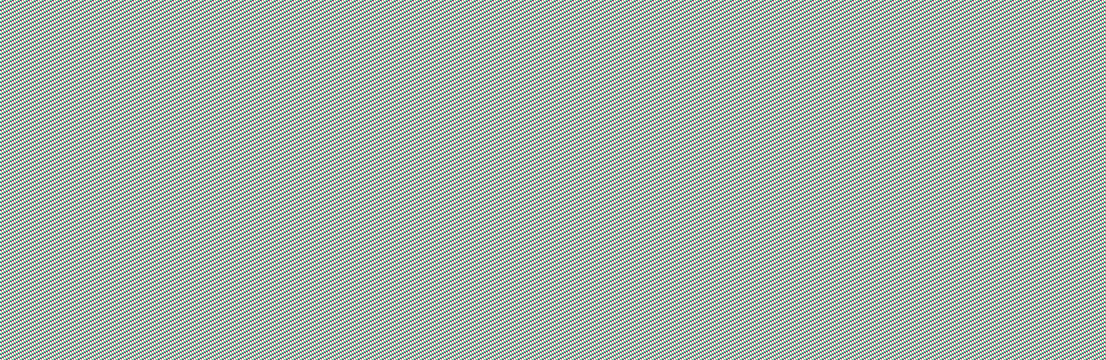

In [47]:
px.bar(data_frame = covid_data_US['Confirmed'])

### Question 9

### Plot Worldwide Confirmed Cases over time

In [22]:
import plotly.express as px
import plotly.io as pio

/home/vostok/.local/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



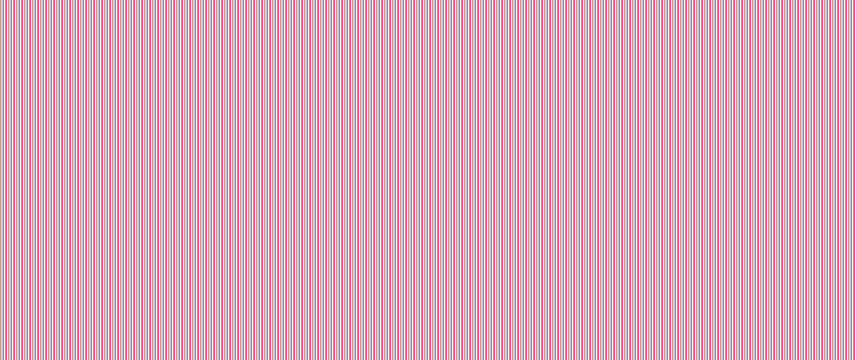

In [63]:
px.line(covid_data.groupby(['Last_Update'])[['Confirmed']].sum())